<a href="https://colab.research.google.com/github/Yohanes213/Spot-the-mask/blob/main/dir_Spot_the_Mask_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/driver/')


Mounted at /content/driver/


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil

from keras.models import Sequential
from keras.layers import Reshape, LSTM, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical


In [ ]:
df = pd.read_csv('/content/driver/MyDrive/Spot the Mask Challenge/images/train_labels.csv')
df_sub = pd.read_csv('/content/driver/MyDrive/Spot the Mask Challenge/images/SampleSubmission (1).csv')

In [ ]:
df.head()

image  target
0  tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg       0
1  rxgismgsvmaayzjarbfjaljhqmpbrt.jpg       1
2  uuzshfrhkgrkolhwdvliqauzulurnz.jpg       0
3  mjspxsagzusaznvnyxgamtrlqkqklp.jpg       0
4  rlbmuajgezfiddjzlyeoupxpqubkpt.jpg       1

In [ ]:
df_sub.head()

image  target
0  aadawlxbmapqrblgxyzarhjasgiobu.png       0
1  abpxvdfyhaaohzcrngcucmhffwizxs.jpg       0
2  aclkjfvackiieiznzfcwienplielrj.jpg       0
3  aelkivmayxgsdjosiibfgmkvfrjvjk.jpg       0
4  aelzzshpfxerelefnkatpczktuxjln.jpg       0

In [ ]:
source_directory = "/content/driver/MyDrive/Spot the Mask Challenge/images/images"

main_directory = "/content/driver/MyDrive/Spot the Mask Challenge/images/"
train_directory = os.path.join(main_directory, "train/")
validation_directory = os.path.join(main_directory, "validation/")
test_directory = os.path.join(main_directory, "test/")

In [ ]:
df['target'].value_counts(normalize='true')

0    0.507645
1    0.492355
Name: target, dtype: float64

<Axes: >

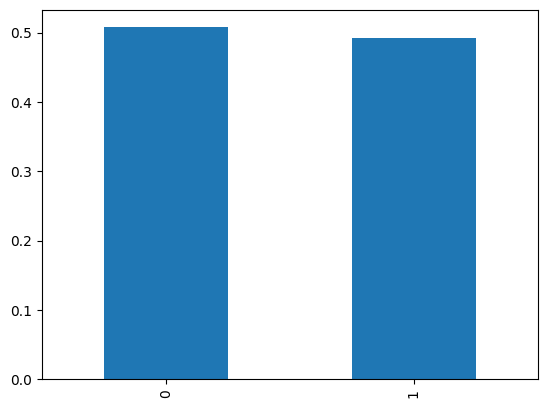

In [ ]:
df['target'].value_counts(normalize='true').plot.bar()

In [ ]:
UNMASK_DIR = "/content/driver/MyDrive/Spot the Mask Challenge/images"
MASK_DIR = "/content/driver/MyDrive/Spot the Mask Challenge/images"

In [ ]:
df.shape

(1308, 2)

In [ ]:
def move_images(df, source_directory, destination_directory):
  for index, row in df.iterrows():
    image = row['image']
    target = row['target']

    source_path = os.path.join(source_directory, image)
    destination_path = os.path.join(destination_directory, str(target))

    if os.path.isfile(source_path):
            # Create the destination directory if it doesn't exist
            os.makedirs(destination_path, exist_ok=True)

            # Move the image to the destination directory
            shutil.move(source_path, os.path.join(destination_path, image))
    else:
            print(f"Warning: Image {image} not found in {source_directory}")



In [ ]:
train_df, validation_df = train_test_split(df, test_size=0.2, stratify=df['target'])

In [ ]:
move_images(train_df, source_directory=source_directory, destination_directory=train_directory)


move_images(validation_df, source_directory=source_directory, destination_directory=validation_directory)

In [ ]:
move_images(df_sub,source_directory=source_directory, destination_directory=test_directory)

In [ ]:
validation_df.shape

(262, 2)

In [ ]:
!pip install efficientnet

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import efficientnet.keras as efn
from keras.layers import GlobalAveragePooling2D

In [ ]:
train_df.shape

(1046, 2)

In [ ]:
image_size = 256
input_shape = (image_size, image_size, 3)

batch_size = 4

baseModel = efn.EfficientNetB0(weights="imagenet", include_top=False,input_shape=(image_size,image_size,3))

16804768/16804768 [==============================] - 0s 0us/step


In [ ]:
headModel = baseModel.output
headModel = GlobalAveragePooling2D(name='avg_pool')(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(1,activation='sigmoid')(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
adam = tf.keras.optimizers.Adam(amsgrad=True)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [ ]:
callbacks = [
    EarlyStopping(patience=15, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1),
    ModelCheckpoint('./Best.h5', monitor='val_loss', mode = 'min' , verbose=1, save_best_only=True, save_weights_only=False)
]

In [ ]:
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output



x = Conv2D(64,(3,3),activation='relu')(last_output)
#pooling layer
#x = MaxPooling2D(2,2)(x)
#x = BatchNormalization()(x)
#convolution layer
x = Conv2D(128,(3,3),activation='relu')(x)
#pooling layer
x = MaxPooling2D(2,2)(x)
x = BatchNormalization()(x)

x = Flatten()(x)

#o/p layer
x = Dense(1,activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

#model.compile(loss='binary_crossentropy',
 #             optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              #optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
  #            metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
#earlystop = EarlyStopping(patience=10)
early_stop=EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=10, restore_best_weights=True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)
callbacks = [early_stop, learning_rate_reduction]

In [ ]:
total_train = train_df.shape[0]
total_validate = validation_df.shape[0]
batch_size=15

In [ ]:
train_datagen=ImageDataGenerator(
                     rescale=1./255,
                     rotation_range=20,
                     zoom_range=0.15,
                     width_shift_range=0.2,
                     height_shift_range=0.2,
                     shear_range=0.15,
                     fill_mode="nearest"
                  )
                    #rotation_range=15,
                    #rescale=1./255,
                    #shear_range=0.1,
                    #zoom_range=0.2, # zoom range (1-0.2 to 1+0.2)
                    #horizontal_flip=True,
                    #width_shift_range=0.1,
                    #height_shift_range=0.1
                 #)

train_generator=train_datagen.flow_from_directory(
                    train_directory,
                    #directory="/content/driver/MyDrive/Spot the Mask Challenge/images/images",
                    target_size=(image_size, image_size),
                    batch_size=batch_size,
                    class_mode='binary',  # Use 'categorical' for multi-class classification
                    shuffle=True
                )

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
                        validation_directory,
                        target_size=(image_size, image_size),
                        batch_size=batch_size,
                        class_mode='binary',  # Use 'categorical' for multi-class classification
                        shuffle=True
)

Found 1041 images belonging to 2 classes.
Found 257 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=70
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=callbacks
)

<ipython-input-26-2778718b7038>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/70
260/260 [==============================] - ETA: 0s - loss: 0.4390 - accuracy: 0.8139
Epoch 1: val_loss improved from inf to 1.19060, saving model to ./Best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


260/260 [==============================] - 448s 2s/step - loss: 0.4390 - accuracy: 0.8139 - val_loss: 1.1906 - val_accuracy: 0.7422 - lr: 0.0010
Epoch 2/70
260/260 [==============================] - ETA: 0s - loss: 0.3064 - accuracy: 0.8862
Epoch 2: val_loss improved from 1.19060 to 0.19507, saving model to ./Best.h5
260/260 [==============================] - 40s 154ms/step - loss: 0.3064 - accuracy: 0.8862 - val_loss: 0.1951 - val_accuracy: 0.9414 - lr: 0.0010
Epoch 3/70
260/260 [==============================] - ETA: 0s - loss: 0.2672 - accuracy: 0.8910
Epoch 3: val_loss did not improve from 0.19507
260/260 [==============================] - 39s 148ms/step - loss: 0.2672 - accuracy: 0.8910 - val_loss: 0.3503 - val_accuracy: 0.8555 - lr: 0.0010
Epoch 4/70
260/260 [==============================] - ETA: 0s - loss: 0.1997 - accuracy: 0.9267
Epoch 4: val_loss did not improve from 0.19507
260/260 [==============================] - 38s 146ms/step - loss: 0.1997 - accuracy: 0.9267 - val_los

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
predictions = model.predict_generator(validation_generator)#, steps=test_generator.samples // batch_size)

# Convert the predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Get the true class labels from the test generator
y_true = validation_generator.classes

# Compute the confusion matrix
confusion_matrix1 = confusion_matrix(y_true, y_pred)

#
predictions = model.predict_generator(train_generator)#, steps=test_generator.samples // batch_size)

# Convert the predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Get the true class labels from the test generator
y_true = train_generator.classes

# Compute the confusion matrix
confusion_matrix2 = confusion_matrix(y_true, y_pred)

<ipython-input-33-e7523053d93e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator)#, steps=test_generator.samples // batch_size)
<ipython-input-33-e7523053d93e>:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(train_generator)#, steps=test_generator.samples // batch_size)


In [ ]:
model.evaluate(validation_generator)

65/65 [==============================] - 4s 54ms/step - loss: 0.0803 - accuracy: 0.9805


[0.08025118708610535, 0.9805447459220886]

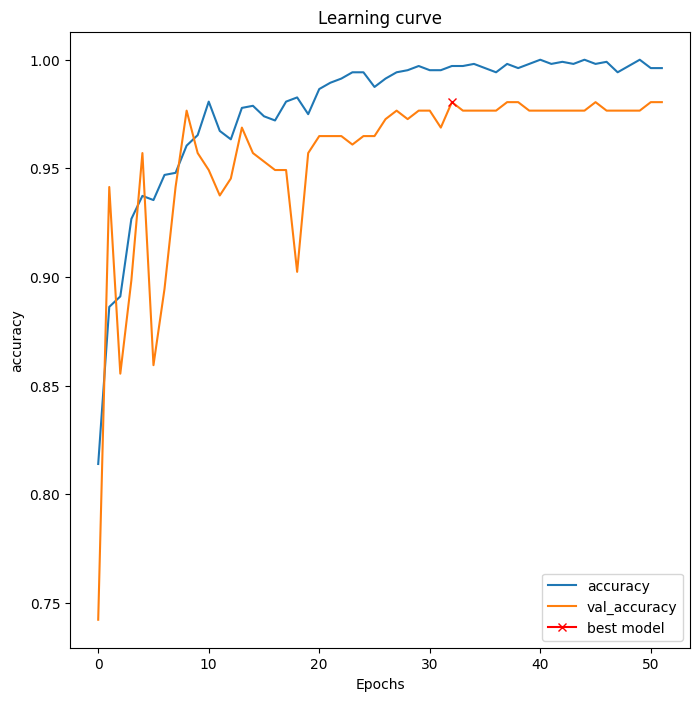

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.plot( np.argmax(history.history["val_accuracy"]), np.max(history.history["val_accuracy"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend();
plt.savefig('./train_accuracy.png')

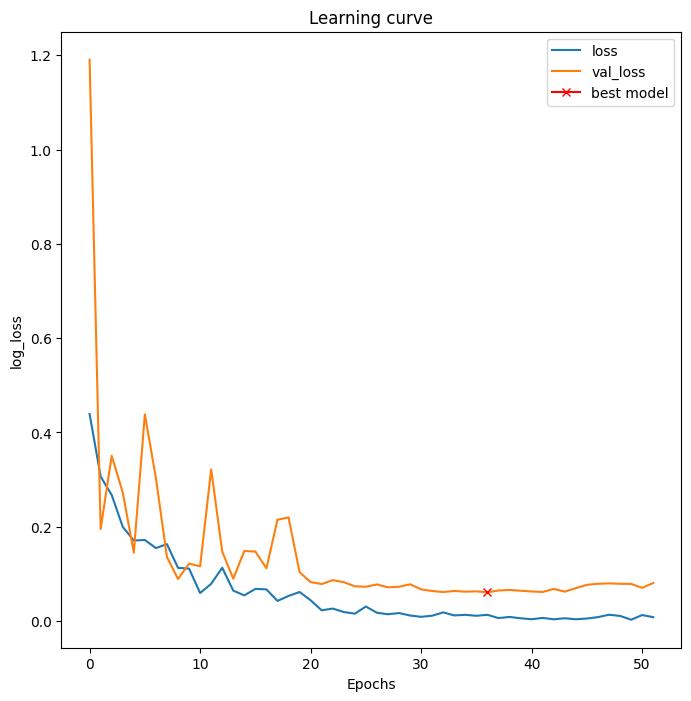

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();
plt.savefig('./train_loss.png')

In [ ]:
accuracy = np.mean(y_pred == y_true)
print('Accuracy:', accuracy)

Accuracy: 0.5091258405379443


In [ ]:
confusion_matrix1

array([[130,   0],
       [127,   0]])

In [ ]:
confusion_matrix2

array([[530,   0],
       [511,   0]])

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(
                    test_directory,
                    #directory="/content/driver/MyDrive/Spot the Mask Challenge/images/images",
                    target_size=(image_size, image_size),
                    batch_size=batch_size,
                    #class_mode='binary',  # Use 'categorical' for multi-class classification
                    shuffle=True
                )

Found 509 images belonging to 1 classes.


In [ ]:
target_predict = model.predict(test_generator)

128/128 [==============================] - 11s 77ms/step


In [ ]:
submission = {k:v for k, v in zip(df_sub['image'], target_predict)}

In [ ]:
sub = pd.Series(submission).to_frame().reset_index()

In [ ]:
sub.columns= [["image", "target"]]

In [ ]:
sub.head()

image           target
0  aadawlxbmapqrblgxyzarhjasgiobu.png  [2.7896847e-05]
1  abpxvdfyhaaohzcrngcucmhffwizxs.jpg      [0.9999821]
2  aclkjfvackiieiznzfcwienplielrj.jpg      [0.9999963]
3  aelkivmayxgsdjosiibfgmkvfrjvjk.jpg  [2.2879956e-05]
4  aelzzshpfxerelefnkatpczktuxjln.jpg    [0.008319055]

In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   (image,)   509 non-null    object
 1   (target,)  509 non-null    object
dtypes: object(2)
memory usage: 8.1+ KB


In [ ]:
sub['target'] = sub['target'].astype('float')

In [ ]:
sub.head()

image    target
0  aadawlxbmapqrblgxyzarhjasgiobu.png  0.000028
1  abpxvdfyhaaohzcrngcucmhffwizxs.jpg  0.999982
2  aclkjfvackiieiznzfcwienplielrj.jpg  0.999996
3  aelkivmayxgsdjosiibfgmkvfrjvjk.jpg  0.000023
4  aelzzshpfxerelefnkatpczktuxjln.jpg  0.008319

In [ ]:
sub.to_csv("submission.csv", index=None)

In [ ]:
sub['target'] = round(sub['target'])

In [ ]:
sub.head()

image target
0  aadawlxbmapqrblgxyzarhjasgiobu.png    0.0
1  abpxvdfyhaaohzcrngcucmhffwizxs.jpg    1.0
2  aclkjfvackiieiznzfcwienplielrj.jpg    1.0
3  aelkivmayxgsdjosiibfgmkvfrjvjk.jpg    0.0
4  aelzzshpfxerelefnkatpczktuxjln.jpg    0.0

In [ ]:
sub['target'].value_counts()

(target,)
1.0          255
0.0          254
dtype: int64

In [ ]:
import cv2
import numpy as np
from PIL import Image

In [ ]:
def read_image(image_path):
    """Reads an image and returns it as a NumPy array."""
    image = cv2.imread(image_path)
    # Convert the image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image to a fixed size
    image = cv2.resize(image, (128, 128))
    image = image.reshape((image.shape[0], -1))
    return image

In [ ]:
sub.head()

image    target
0  aadawlxbmapqrblgxyzarhjasgiobu.png  0.000028
1  abpxvdfyhaaohzcrngcucmhffwizxs.jpg  0.999982
2  aclkjfvackiieiznzfcwienplielrj.jpg  0.999996
3  aelkivmayxgsdjosiibfgmkvfrjvjk.jpg  0.000023
4  aelzzshpfxerelefnkatpczktuxjln.jpg  0.008319

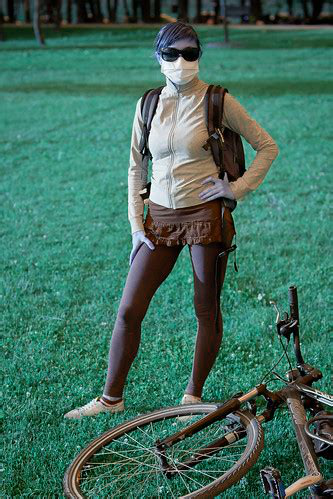

In [ ]:
#image =  cv2.imread('/content/driver/MyDrive/Spot the Mask Challenge/images/test/0/aclkjfvackiieiznzfcwienplielrj.png')
image =  cv2.imread('/content/driver/MyDrive/Spot the Mask Challenge/images/test/0/aadawlxbmapqrblgxyzarhjasgiobu.png')

pil_image = Image.fromarray(image)

# Display the image
display(pil_image)

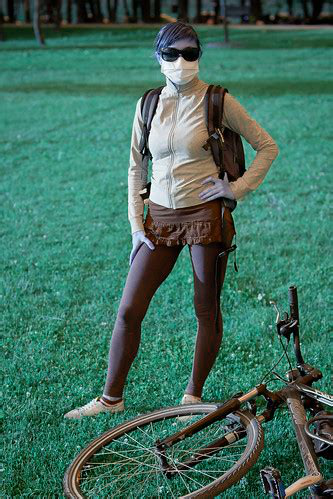

Label: 0.0


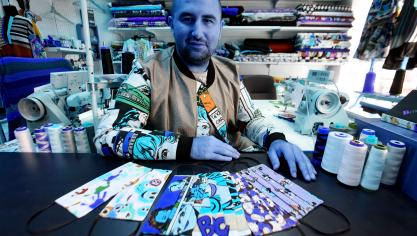

Label: 1.0


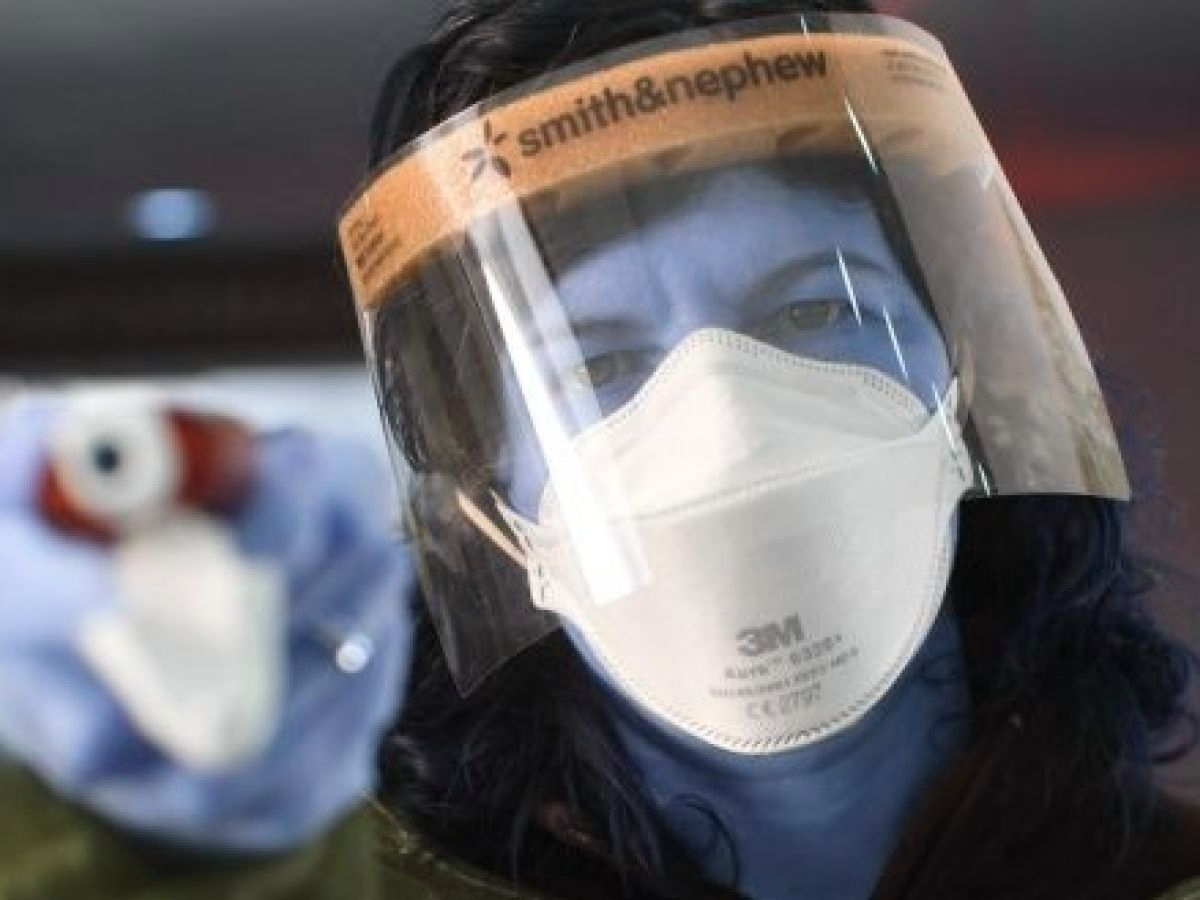

Label: 1.0


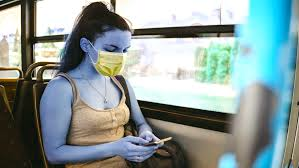

Label: 0.0


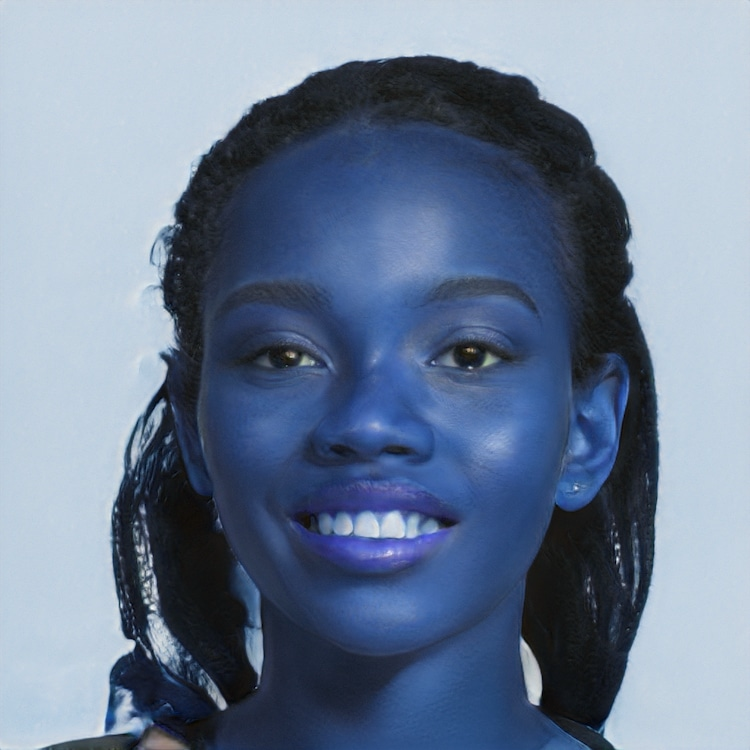

Label: 0.0


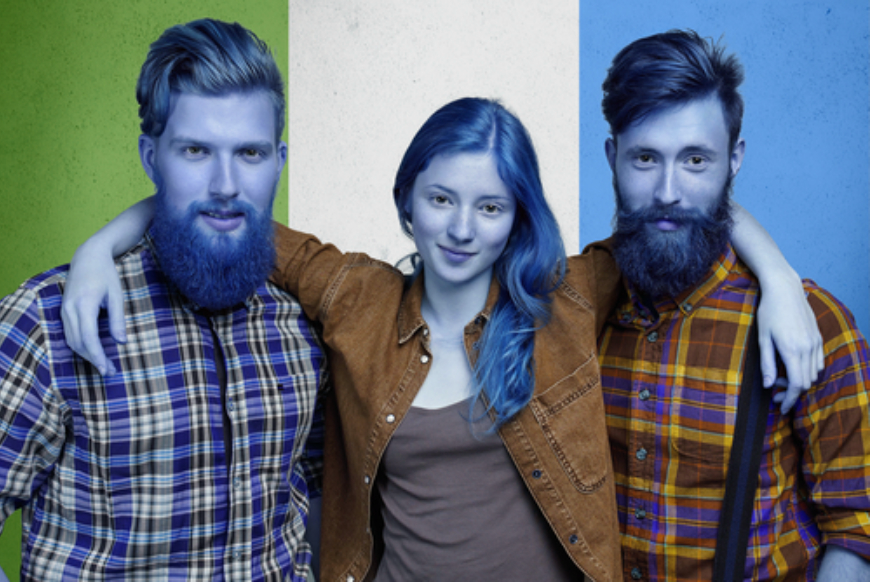

Label: 0.0


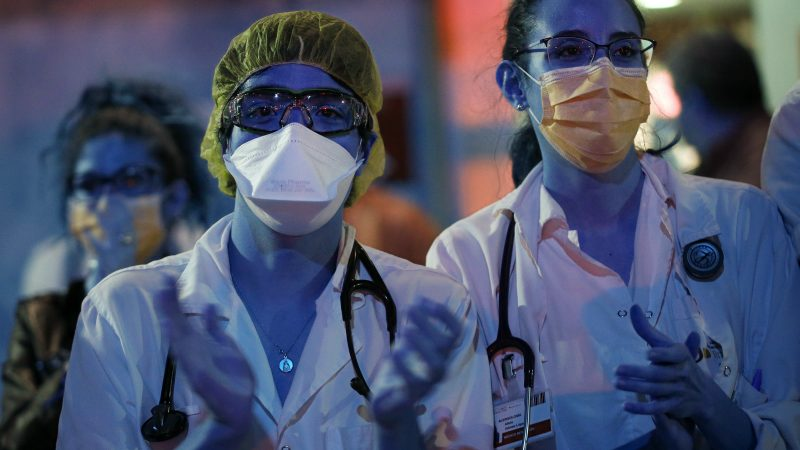

Label: 0.0


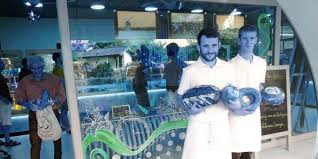

Label: 0.0


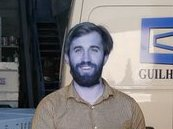

Label: 0.0


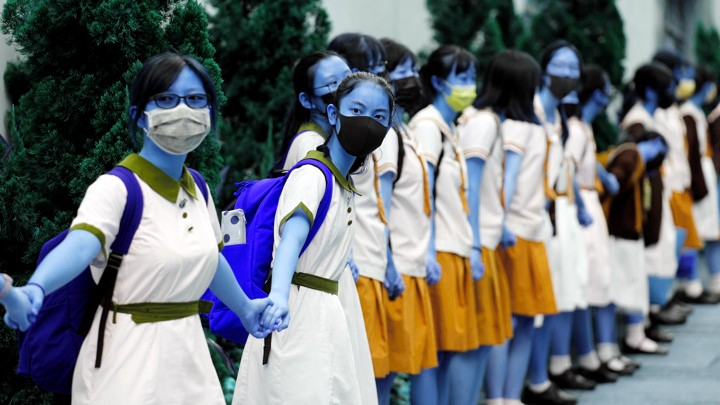

Label: 1.0


In [ ]:
base_dir = '/content/driver/MyDrive/Spot the Mask Challenge/images/test/0/'
for index,row in sub[:10].iterrows():
  image_name = row['image']
  label = row['target']

  image = f'{base_dir+image_name}'
  # image = image.reshape(224, 224)
  image = cv2.imread(image)
  pil_image = Image.fromarray(image)

  # Display the image
  display(pil_image)
  print(f"Label: {label}")
  #plt.show()

In [ ]:
sub.head()

image target
0  aadawlxbmapqrblgxyzarhjasgiobu.png    0.0
1  abpxvdfyhaaohzcrngcucmhffwizxs.jpg    1.0
2  aclkjfvackiieiznzfcwienplielrj.jpg    1.0
3  aelkivmayxgsdjosiibfgmkvfrjvjk.jpg    0.0
4  aelzzshpfxerelefnkatpczktuxjln.jpg    0.0

In [ ]:
base_dir = '/content/driver/MyDrive/Spot the Mask Challenge/images/test/0/'
image = 'aadawlxbmapqrblgxyzarhjasgiobu.png'
print(base_dir)

/content/driver/MyDrive/Spot the Mask Challenge/images/test/0/
